In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Information about the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8524 entries, 0 to 8523
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7061 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null float64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


In [4]:
# Identify if unique id is having any missing values
train[train.Item_Identifier.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,NaN,12.858978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# One record contains all the Null values that record should be deleted from the file
train = train[:8523]

In [6]:
# Summary of all continuous variables
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Summary of all categorical variables
train.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
# Number of missing values
print('Number of missing values')
print('-'*30)
print('Outlet_Size: ',sum(train.Outlet_Size.isnull()))
print('Item_Weight: ', sum(train.Item_Weight.isnull()))

Number of missing values
------------------------------
Outlet_Size:  2410
Item_Weight:  1463


In [9]:
# All unqiue values of categorical data
print(train.Item_Fat_Content.unique())
print(train.Item_Type.unique())
print(train.Outlet_Identifier.unique())
print(train.Outlet_Size.unique())
print(train.Outlet_Location_Type.unique())
print(train.Outlet_Type.unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [10]:
Item_type_mapping = {'Dairy': 1, 'Soft Drinks': 2, 'Meat': 3, 'Fruits and Vegetables': 4, 'Household': 5, 'Baking Goods': 6, 'Snack Foods': 7, 
                     'Frozen Foods': 8, 'Breakfast': 9, 'Health and Hygiene': 10, 'Hard Drinks': 11, 'Canned': 12, 'Breads' : 13, 
                     'Starchy Foods': 14, 'Others': 15, 'Seafood': 16}
print(Item_type_mapping)

{'Dairy': 1, 'Soft Drinks': 2, 'Meat': 3, 'Fruits and Vegetables': 4, 'Household': 5, 'Baking Goods': 6, 'Snack Foods': 7, 'Frozen Foods': 8, 'Breakfast': 9, 'Health and Hygiene': 10, 'Hard Drinks': 11, 'Canned': 12, 'Breads': 13, 'Starchy Foods': 14, 'Others': 15, 'Seafood': 16}


In [11]:
train['Item_Type'] = train['Item_Type'].map(Item_type_mapping)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,1,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,2,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,3,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,4,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,5,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [12]:
# Create a list of mean of weights according to the item type
mean_item_weight = np.zeros(16)
for i in range(0,16):
    guess =  train[train['Item_Type'] == (i+1)]['Item_Weight'].dropna()
    
    mean_item_weight[i] = guess.mean()

In [13]:
# Replace the null values of item weight with mean values according to item type
for i in range(0,16):
    train.loc[(train['Item_Type'] == (i+1)) & (train['Item_Weight'].isnull()), 'Item_Weight'] = mean_item_weight[i] 

In [14]:
# Check if any more null values are present
print('Item_Weight: ', sum(train.Item_Weight.isnull()))

Item_Weight:  0


In [15]:
# Item_Fat_Content has LF and reg which is just shortform of low fat and regular
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(('LF', 'reg'), ('low fat', 'Regular'))
print(train.Item_Fat_Content.unique())

['Low Fat' 'Regular' 'low fat']


In [44]:
from sklearn.preprocessing import LabelEncoder 



In [16]:
# Replace missing values with mean values
# imp = Imputer()
# train.iloc[:,[1,3,5,7,11]]=imp.fit_transform(train.iloc[:,[1,3,5,7,11]])

In [17]:
# Idenfity which Outlet_Size contibues to maximum sale
train[['Outlet_Size', 'Item_Outlet_Sales']].groupby('Outlet_Size', as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Size,Item_Outlet_Sales
1,Medium,2681.603542
0,High,2298.995256
2,Small,1912.149161


In [18]:
# Idenfity which Item_Type contibues to maximum sale
train[['Item_Type', 'Item_Outlet_Sales']].groupby('Item_Type', as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Type,Item_Outlet_Sales
13,14,2374.332773
15,16,2326.065928
3,4,2289.009592
6,7,2277.321739
4,5,2258.784300
0,1,2232.542597
11,12,2225.194904
12,13,2204.132226
2,3,2158.977911
10,11,2139.221622


In [19]:
# Idenfity which type Item_Fat_Content contibues to maximum sale
train[['Item_Fat_Content', 'Item_Outlet_Sales']].groupby('Item_Fat_Content', as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Fat_Content,Item_Outlet_Sales
1,Regular,2224.561170
0,Low Fat,2164.477336
2,low fat,2077.264888


In [20]:
# Idenfity which Outlet_Location_Type contibues to maximum sale
train[['Outlet_Location_Type', 'Item_Outlet_Sales']].groupby('Outlet_Location_Type', as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Location_Type,Item_Outlet_Sales
1,Tier 2,2323.990559
2,Tier 3,2279.627651
0,Tier 1,1876.909159


In [21]:
# Idenfity which Outlet_Type contibues to maximum sale
train[['Outlet_Type', 'Item_Outlet_Sales']].groupby('Outlet_Type', as_index=False).mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Outlet_Type,Item_Outlet_Sales
3,Supermarket Type3,3694.038558
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
0,Grocery Store,339.828500


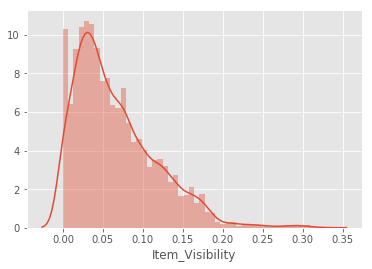

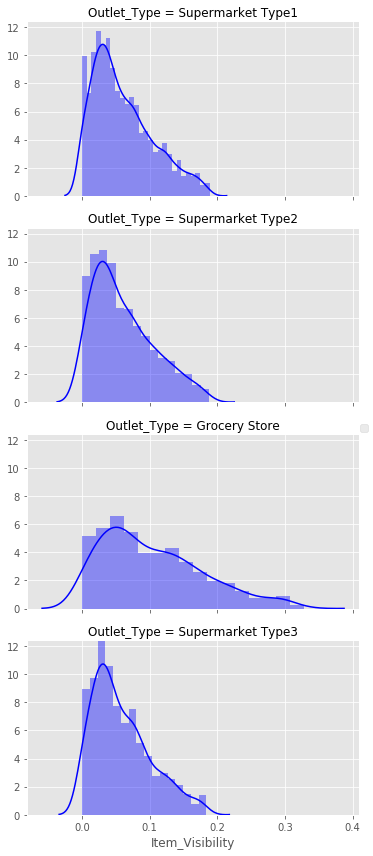

In [22]:
# Plotting distribution of Item_Visibility
sns.distplot(train['Item_Visibility'].dropna())

# Item_Visibility is positively skewed most of the items have low visibiltity this also needs to be considered with type of store
grid = sns.FacetGrid(train, row='Outlet_Type',  aspect=1.7)
grid.map(sns.distplot, 'Item_Visibility', color='blue')
grid.add_legend()
# Most of the items have low visibility

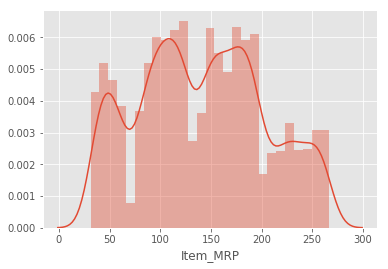

In [23]:
# Plotting distribution of Item_MRP
sns.distplot(train['Item_MRP'].dropna())

# grid = sns.FacetGrid(train, row='Item_Type' , aspect=1.7)
# grid.map(sns.distplot, 'Item_MRP', color='blue')
# grid.add_legend()

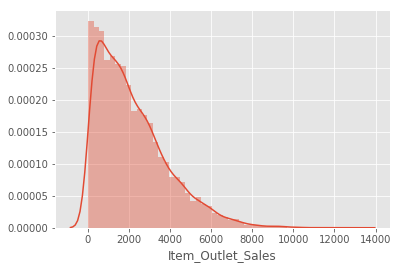

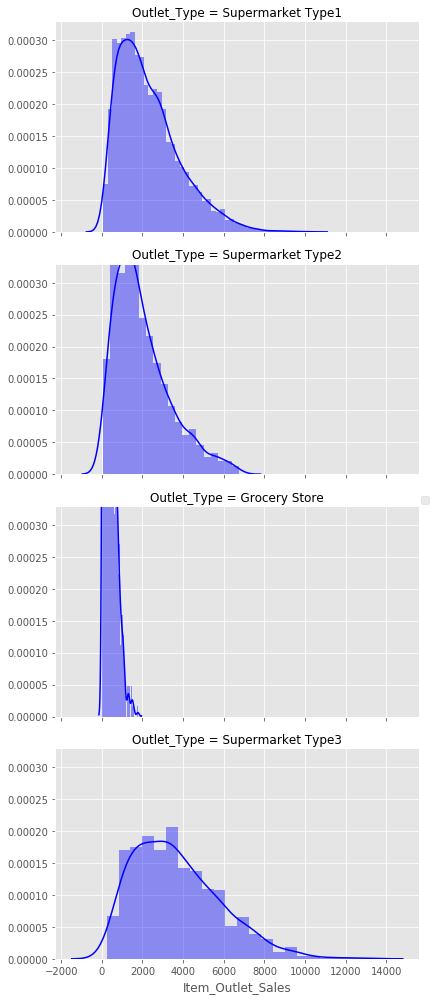

In [24]:
sns.distplot(train['Item_Outlet_Sales'].dropna())

grid = sns.FacetGrid(train, row='Outlet_Type' , aspect=1.7, size=3.5)
grid.map(sns.distplot, 'Item_Outlet_Sales', color='blue')
grid.add_legend()

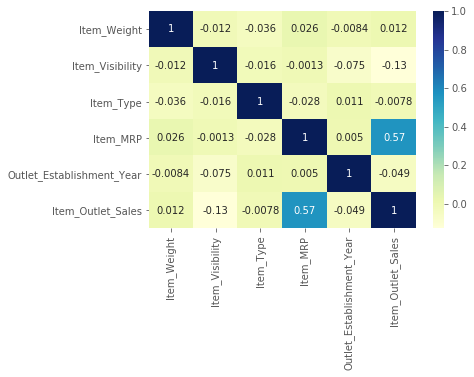

In [25]:
corelation = train.corr()
sns.heatmap(corelation, xticklabels=corelation.columns.values, yticklabels=corelation.columns.values, annot=True, cmap="YlGnBu")

In [26]:
sum(train.Outlet_Size.isnull())

2410

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null float64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.1+ KB


In [28]:
print('For medium size')
print('-'*30)
print(train[(train['Outlet_Size'] == 'Medium') & (train['Outlet_Size'].notnull())].groupby('Outlet_Location_Type')['Outlet_Location_Type'].count())
print(train[(train['Outlet_Size'] == 'Medium') & (train['Outlet_Size'].notnull())].groupby('Outlet_Type')['Outlet_Type'].count())
print(train[(train['Outlet_Size'] == 'Medium') & (train['Outlet_Size'].notnull())].groupby('Outlet_Establishment_Year')['Outlet_Establishment_Year'].count())

For medium size
------------------------------
Outlet_Location_Type
Tier 1     930
Tier 3    1863
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    930
Supermarket Type2    928
Supermarket Type3    935
Name: Outlet_Type, dtype: int64
Outlet_Establishment_Year
1985.0    935
1999.0    930
2009.0    928
Name: Outlet_Establishment_Year, dtype: int64


In [29]:
print('For high size')
print('-'*30)
print(train[(train['Outlet_Size'] == 'High') & (train['Outlet_Size'].notnull())].groupby('Outlet_Location_Type')['Outlet_Location_Type'].count())
print(train[(train['Outlet_Size'] == 'High') & (train['Outlet_Size'].notnull())].groupby('Outlet_Type')['Outlet_Type'].count())

For high size
------------------------------
Outlet_Location_Type
Tier 3    932
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    932
Name: Outlet_Type, dtype: int64


In [30]:
print('For small size')
print('-'*30)
print(train[(train['Outlet_Size'] == 'Small') & (train['Outlet_Size'].notnull())].groupby('Outlet_Location_Type')['Outlet_Location_Type'].count())
print(train[(train['Outlet_Size'] == 'Small') & (train['Outlet_Size'].notnull())].groupby('Outlet_Type')['Outlet_Type'].count())
print(train[(train['Outlet_Size'] == 'Small') & (train['Outlet_Size'].notnull())].groupby('Outlet_Establishment_Year')['Outlet_Establishment_Year'].count())

For small size
------------------------------
Outlet_Location_Type
Tier 1    1458
Tier 2     930
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Grocery Store         528
Supermarket Type1    1860
Name: Outlet_Type, dtype: int64
Outlet_Establishment_Year
1985.0    528
1997.0    930
2004.0    930
Name: Outlet_Establishment_Year, dtype: int64


In [31]:
group = train.groupby(['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year'], axis=0)
group.size()

Outlet_Size  Outlet_Location_Type  Outlet_Type        Outlet_Establishment_Year
High         Tier 3                Supermarket Type1  1987.0                       932
Medium       Tier 1                Supermarket Type1  1999.0                       930
             Tier 3                Supermarket Type2  2009.0                       928
                                   Supermarket Type3  1985.0                       935
Small        Tier 1                Grocery Store      1985.0                       528
                                   Supermarket Type1  1997.0                       930
             Tier 2                Supermarket Type1  2004.0                       930
dtype: int64

In [32]:
print(pd.crosstab(train['Outlet_Location_Type'], train['Outlet_Size']))
print('-'*45)
print(pd.crosstab(train['Outlet_Type'], train['Outlet_Size']))
print('-'*45)
print(pd.crosstab(train['Outlet_Establishment_Year'], train['Outlet_Size']))

Outlet_Size           High  Medium  Small
Outlet_Location_Type                     
Tier 1                   0     930   1458
Tier 2                   0       0    930
Tier 3                 932    1863      0
---------------------------------------------
Outlet_Size        High  Medium  Small
Outlet_Type                           
Grocery Store         0       0    528
Supermarket Type1   932     930   1860
Supermarket Type2     0     928      0
Supermarket Type3     0     935      0
---------------------------------------------
Outlet_Size                High  Medium  Small
Outlet_Establishment_Year                     
1985.0                        0     935    528
1987.0                      932       0      0
1997.0                        0       0    930
1999.0                        0     930      0
2004.0                        0       0    930
2009.0                        0     928      0


In [33]:
train[train['Outlet_Size'].isnull()].groupby(['Outlet_Location_Type'], axis=0).count()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Outlet_Location_Type,,,,,,,,,,,
Tier 2,1855,1855,1855,1855,1855,1855,1855,1855,0,1855,1855
Tier 3,555,555,555,555,555,555,555,555,0,555,555


In [38]:
# train[(train['Outlet_Establishment_Year'].isin([1997, 2004]))]['Outlet_Size'].isnull()

In [35]:
print(train.groupby(['Outlet_Size']).size())

Outlet_Size
High       932
Medium    2793
Small     2388
dtype: int64


In [36]:
# Xtrain = train[train['Outlet_Size'].notnull()]
# Xtrain = Xtrain.iloc[:,[7,9,10]].values
# Xtrain
# ytrain = train[train['Outlet_Size'].notnull()]
# ytrain = ytrain.iloc[:,8].values
# ytrain

# Xtest = train[train['Outlet_Size'].isnull()]
# Xtest = Xtest.iloc[:,[7,9,10]].values
# Xtest
# ytest = train[train['Outlet_Size'].isnull()]
# ytest = ytest.iloc[:,8].values
# ytest

In [37]:
# from sklearn.tree import DecisionTreeClassifier

# classifier = DecisionTreeClassifier()
# classifier.fit(Xtrain, ytrain)

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,1,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,2,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,3,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,4,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,5,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
